In [2]:
# Name: Sufiya Mulla
# Batch : July 5 
# problem statement no 1 : Titanic Survival Prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing the data
data = pd.read_csv("G://data/tested.csv")
data.shape

(418, 12)

In [4]:
data.head() #taking a look at dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.columns #checking for the columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.describe() #checking the numerical values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
data.info() #checking the null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
#cleaning

In [9]:
#checking for total null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
#cabin has a lot of null values, check it
data['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [11]:
data['Cabin'].isnull().sum()

327

In [12]:
#we only have 76 values available and 327 null values so it will be good to drop the Cabin column
data = data.drop(columns='Cabin', axis=1)

In [13]:
data.shape #checking for other columns 

(418, 11)

In [14]:
data.isnull().sum() #checking for other columns 

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [15]:
# Fare has only one null value so we can fill that with the mean of the column Fare
data['Fare'].fillna(data['Fare'].mean(),inplace = True)

In [16]:
data.isnull().sum() #Fare is done now we have left the Age column

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

C:\Users\cli\AppData\Local\Temp\ipykernel_11732\2757819177.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

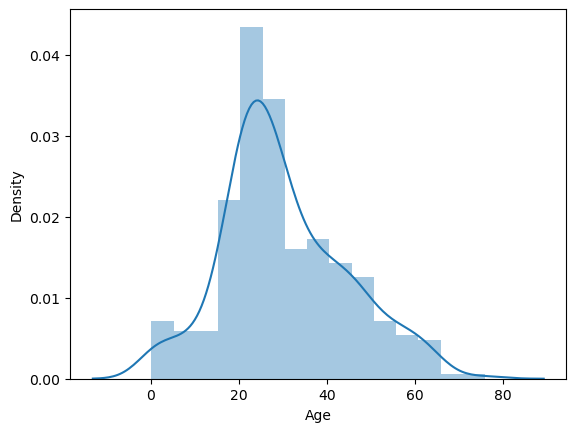

In [17]:
# let's  look for the Age values Density
sns.distplot(data['Age'])

In [18]:
# the data is pretty much normally distributed so we can replace the null values with the following formula
#mean of age - std. dev of age , mean of age + std. dev of age
#randomly on to null positions

In [19]:
#check for the total null values we need to replace
data['Age'].isnull().sum()

86

In [93]:
data_age = np.random.randint(data['Age'].mean()-data['Age'].std(),data['Age'].mean()+data['Age'].std(),86)

In [94]:
data['Age'][data['Age'].isnull()] = data_age

C:\Users\cli\AppData\Local\Temp\ipykernel_7376\942327180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'][data['Age'].isnull()] = data_age


In [95]:
data.isnull().sum() #no null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [96]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [97]:
#check for categorical and integer type of columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.336124,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,13.183065,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,28.250000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [98]:
data["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [99]:
data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [100]:
# doing transformation into categorical columns for the columns Sex and Embarked
data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [101]:
data.head() #successfully replaced the values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [102]:
#droping the columns which are less important
data = data.drop(columns=['PassengerId','Name'],axis=1)

In [103]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,34.5,0,0,330911,7.8292,2
1,1,3,1,47.0,1,0,363272,7.0000,0
2,0,2,0,62.0,0,0,240276,9.6875,2
3,0,3,0,27.0,0,0,315154,8.6625,0
4,1,3,1,22.0,1,1,3101298,12.2875,0
...,...,...,...,...,...,...,...,...,...
413,0,3,0,21.0,0,0,A.5. 3236,8.0500,0
414,1,1,1,39.0,0,0,PC 17758,108.9000,1
415,0,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0
416,0,3,0,35.0,0,0,359309,8.0500,0


In [114]:
X = data.drop(columns=['Survived','Ticket'], axis=1)#features
y = data['Survived']                                #target

In [200]:
from sklearn.model_selection import train_test_split

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)  #spliting data in to straing and testing 

In [237]:
from sklearn.linear_model import LogisticRegression #importing model

In [238]:
model = LogisticRegression()

In [239]:
model.fit(X_train, y_train)  # training of the model

LogisticRegression()

In [240]:
prediction = model.predict(X_train)  #prediction

In [241]:
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(y_train,prediction)
print('Accuracy score of training data : ', training_data_accuracy)
#finding out the accuracy score

Accuracy score of training data :  1.0
